# Linear algebra with Numpy

Jesús David Petro Ramos - T00065696 \
Universidad Tecnológica de Bolívar

Based on the jupyter notebook by [Vince Knight](https://github.com/drvinceknight/Python-Mathematics-Handbook)


> En este notebook se presentan únicamente las soluciones a los ejercicios del notebook original `00_Linear_algebra_with_Numpy` asignado por el profesor Nauffal.

#### _Liberias utilizadas_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## __Manipulating matrices__

### **Exercise**

Compute $A ^ 2 - 2 A + 3$ with

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

<div style="border-left: 4px solid #f5c354; padding: 0.5em; background-color: rgba(243, 171, 44, 0.1); border-radius: 6px;">
  <strong style="color: #f3ab2c;">
    <svg xmlns="http://www.w3.org/2000/svg" width="15" height="15" viewBox="0 0 24 24" fill="none" stroke="#f3ab2c" stroke-width="2" stroke-linecap="round" stroke-linejoin="round" style="vertical-align: -1px;">
      <path d="m21.73 18-8-14a2 2 0 0 0-3.48 0l-8 14A2 2 0 0 0 4 21h16a2 2 0 0 0 1.73-3"/>
      <path d="M12 9v4"/>
      <path d="M12 17h.01"/>
    </svg>
  </strong>
  <strong style="color: #f3ab2c;"> Warning </strong> <br>
  <span style="color: #000;">
    <b><i>A<sup>2</sup></i></b> es diferente a <b><i>A ** 2</i></b>
  </span>
</div>


Según la diapositiva 25 de la presentación *Lec01-linear-algebra-primer*, la operación de **potencia de una matriz** consiste en multiplicar la misma matriz por sí misma tantas veces como lo indique el exponente. Es decir, si tenemos $A^2$, esto equivale a  $AA$ , lo cual, en sintaxis de Python usando NumPy, se representa como `A @ A`.  
> **Importante**: esta operación solo es válida si la matriz $A$ es **cuadrada** (tiene el mismo número de filas y columnas).

Por otro lado, si escribimos `A ** 2` en Python, lo que hacemos es elevar **cada elemento individual** de la matriz al cuadrado, lo cual **no corresponde a una multiplicación matricial** y por tanto sería un procedimiento **erróneo** si lo que se busca es $A^2$ en el sentido algebraico.

Para visualizar esto de manera gráfica, consideremos una matriz $A$:

$$
A =
\begin{pmatrix}
w & x \\
y & z
\end{pmatrix}
$$

Entonces:

$$
A^2 = A @ A =
\begin{pmatrix}
w & x \\
y & z
\end{pmatrix}
\begin{pmatrix}
w & x \\
y & z
\end{pmatrix}
$$

$$
A**2 =
\begin{pmatrix}
w^2 & x^2 \\
y^2 & z^2
\end{pmatrix}
$$

> **Nota**: también se puede utilizar el método `numpy.linalg.matrix_power(A, n)` para calcular potencias de matrices de forma correcta.


In [7]:
A = np.array([
    [1, -1], 
    [2,  1]
])

result = A@A - 2*A + 3

print("El resultado de A^2 - 2A + 3 es: \n", result)

El resultado de A^2 - 2A + 3 es: 
 [[0 3]
 [3 0]]


In [8]:
#Otra forma de calcularlo usando el np.linalg.matrix_power

result2 = np.linalg.matrix_power(A,2) - 2*A + 3
print(result2)

[[0 3]
 [3 0]]


In [3]:
A ** 2

array([[4, 4],
       [4, 4]])

In [4]:
A @ A

array([[8, 8],
       [8, 8]])

## __Solving Matrix equations__



### **EXERCISE** 

Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$



In [39]:
# Declaramos las matrices B y b
B = np.array([[14, -2, 12],
              [4, 4, 5],
              [5, 5, 1]])

b = np.array([[-1], [2], [1]])

"""
np.linalg.solve resuelve un sistema de ecuaciones lineales de la forma Ax = b,
donde A es la matriz de coeficientes, x es el vector de incógnitas, y b es el vector de términos independientes.
Devuelve la solución x tal que A @ x = b.
"""
x = np.linalg.solve(B, b)

print(f'x = {x}')

# Confirmamos que el resultado sea correcto
# el \033[<numero>m es un código de escape ANSI para cambiar el color del texto en la terminal.
print("\n\n \033[31m--- Verificación de la solución ---\033[0m")
print("B @ x = \n", dot:= B @ x)
print("\nb = \n", b)

# Otra forma de verificar la solución. 
# np.allclose verifica si dos arrays son iguales dentro de una tolerancia.
print(f"\n\033[31m¿Bx = b?\033[0m {np.allclose(dot, b)}")


x = [[-0.25892857]
 [ 0.40178571]
 [ 0.28571429]]


 --- Verificación de la solución ---
B @ x = 
 [[-1.]
 [ 2.]
 [ 1.]]

b = 
 [[-1]
 [ 2]
 [ 1]]

¿Bx = b? True


## Matrix inversion and determinants

### **EXERCISE** 
Compute the inverse and determinant of $B$ (defined previously).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$

In [40]:
Binv = np.linalg.inv(B)
detB = np.linalg.det(B)

print(f"\n\nEl determinante de B es: {detB}")
print(f"\n\nLa inversa de B es:\n{Binv}")

# Verificamos la solución
print("\n\n\033[31m--- Verificación de la solución: ---\033[0m")

print(f'\n¿Está bien la inversa? \n\n \
\033[31mB^-1 * B = I -> \033[0m \n {(tmp:= Binv @ B)} \n\n \
\033[31mallclose: \033[0m{np.allclose(tmp, np.eye(3))}')






El determinante de B es: -336.0


La inversa de B es:
[[ 6.25000000e-02 -1.84523810e-01  1.72619048e-01]
 [-6.25000000e-02  1.36904762e-01  6.54761905e-02]
 [-1.09511795e-17  2.38095238e-01 -1.90476190e-01]]


--- Verificación de la solución: ---

¿Está bien la inversa? 

 B^-1 * B = I ->  
 [[ 1.00000000e+00 -2.77555756e-17  5.55111512e-17]
 [-8.32667268e-17  1.00000000e+00 -1.94289029e-16]
 [-2.77555756e-17  8.32667268e-17  1.00000000e+00]] 

 allclose: True


## __Rotations__

### **EXERCISE**

Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.


__Rotation matrix__
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\\\
\sin(\theta) & \cos(\theta)
\end{bmatrix}

In [60]:

points = np.array([
    [0,  1, -1, 0], 
    [1, -1, -1, 1]
])



In [61]:
# Here is the function
def rotation_matrix(theta):
    theta_rad = np.deg2rad(theta)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


In [104]:
# función para graficar la rotación

def plt_rotation_matrix(ax, theta, points, color = 'b',  label = ''):
    R = rotation_matrix(theta)
    rotated_points = R @ points # tambien se puede usar np.dot(R, points)
    ax.plot(rotated_points[0], rotated_points[1], color=color, label=f'Rotación {theta}°' if not label else f'{label}')
    ax.axis('equal')
    # ax.set_aspect('equal', adjustable='box') -> prueba que posiblemente no termine usando
    ax.grid()
    ax.legend()

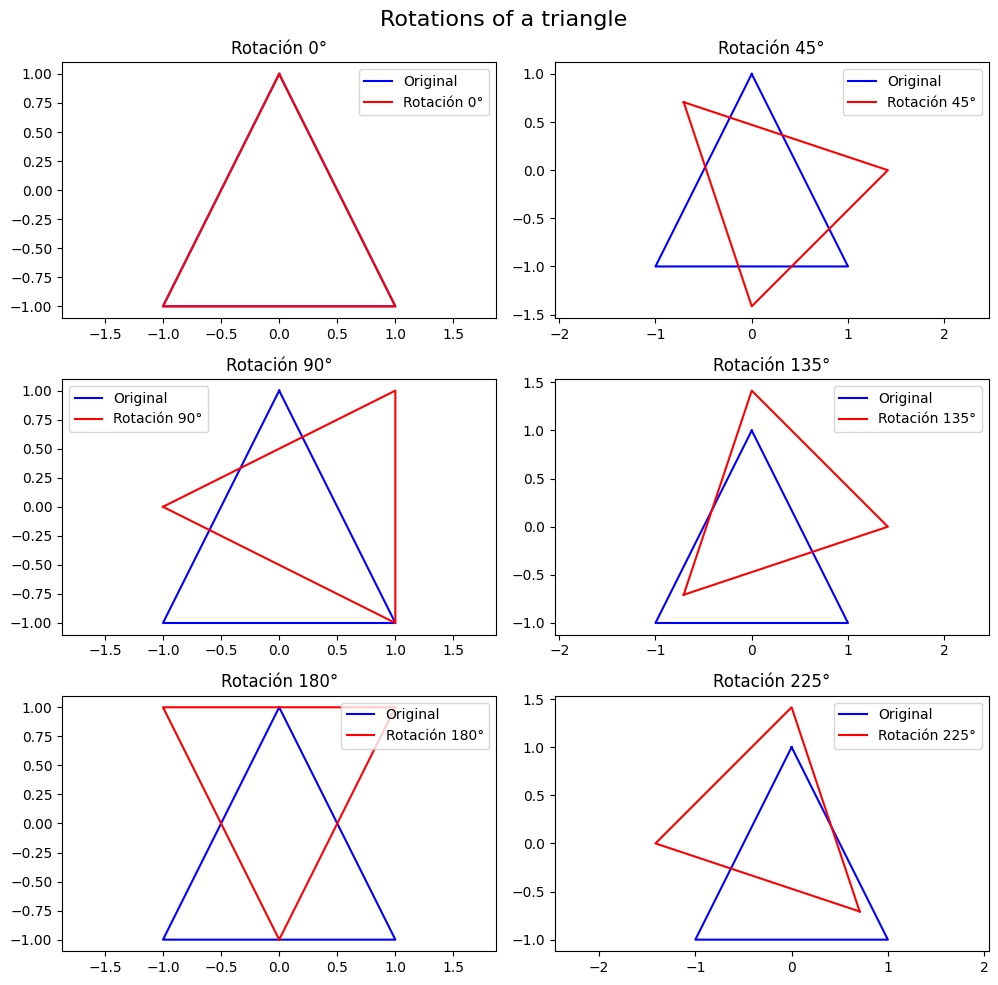

In [105]:
grid = (3, 2) # el tamañode los subplots, se hace de esta manera por si la persona lo quiere modificar, no tenga que modificar todo el código

fig, axes = plt.subplots(*grid, figsize=(10, 10))
total_axes = axes.flat # se aplana el array de ejes para poder iterar sobre ellos fácilmente
rotation_degrees = [45 * _ for _ in range(len(total_axes)) ] # en base a la cantidad de subplots, se generan los grados de rotación


for ax, deg in zip(total_axes, rotation_degrees):
    ax.set_title(f'Rotación {deg}°')

    plt_rotation_matrix(ax, 0, points, color='b', label = 'Original')
    plt_rotation_matrix(ax, deg, points, color='r')


fig.suptitle("Rotations of a triangle", fontsize=16)
plt.tight_layout()
plt.show()

## **Image Compression and Reconstruction using SVD**

<div style="border-left: 4px solid #f5c354; padding: 0.5em; background-color: rgba(243, 171, 44, 0.1); border-radius: 6px;">
  <strong style="color: #f3ab2c;">
    <svg xmlns="http://www.w3.org/2000/svg" width="15" height="15" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round" style="vertical-align: -1px;">
      <path d="m21.73 18-8-14a2 2 0 0 0-3.48 0l-8 14A2 2 0 0 0 4 21h16a2 2 0 0 0 1.73-3"/>
      <path d="M12 9v4"/>
      <path d="M12 17h.01"/>
    </svg>
    Warning
  </strong><br>
  <span style="color: #fff;">
    Este modelo puede fallar si los datos están mal formateados.
  </span>
</div>


<div style="border-left: 4px solid rgb(23, 146, 153); background-color: rgba(23, 146, 153, 0.1); padding: 0.5em; border-radius: 6px;">
  <strong style="color: rgb(23, 146, 153);">
    <svg xmlns="http://www.w3.org/2000/svg" width="15" height="15" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round" style=" vertical-align: -1px; margin-right: 4px;">
      <circle cx="12" cy="12" r="10"/>
      <path d="M12 16v-4"/>
      <path d="M12 8h.01"/>
    </svg>Info
  </strong><br>
  <span style="color: #ffffff;">Este es un bloque informativo con fondo translúcido y texto opaco.</span>
</div>


---

<div style="border-left: 4px solid rgb(23, 146, 153); padding: 0.5em; background-color: rgba(23, 146, 153, 0.1); border-radius: 6px;">
  <strong style="color: rgb(23, 146, 153);"><svg xmlns="http://www.w3.org/2000/svg" width="15" height="15" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round" class="lucide lucide-info-icon lucide-info"><circle cx="12" cy="12" r="10"/><path d="M12 16v-4"/><path d="M12 8h.01"/></svg> Info</strong><br>
  <span style="color: #ffffff;">Este es un bloque informativo con fondo translúcido y texto opaco.</span>
</div>



<div style="border-left: 4px solid #f5c354; padding: 0.5em; background-color: rgba(243, 171, 44, 0.1); border-radius: 6px;">
  <strong style="color: #f3ab2c;">⚠️ Warning</strong><br>
  <span style="color: #fff;">Este modelo puede fallar si los datos están mal formateados.</span>
</div>
